# Week 4

## Part 0 Regular expressions

> * Now, explain in your own words: what are regular expressions?

Regular expression is a tool which enable us to work on data that have the data type of strings. It allow us to look for patterns in strings.

> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/suneman/socialgraphs2016/master/files/test.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.

In [1]:
import io
import re
import os
from operator import itemgetter
from collections import Counter
import urllib2
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
 # Open file
f = open('test.txt', 'r')
# Feed the file text into findall(); it returns a list of all the found strings
four_digit = re.findall(r'\s\d\d\d\d\s', f.read())
for four_digit in four_digit:
    print four_digit

 1234 
 9999 


> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/suneman/socialgraphs2016/master/files/test.txt).

In [4]:
f = open('test.txt', 'r')
word_super = re.findall(r'super\w+',f.read())
for word_super in word_super:
    print word_super

superpolaroid
supertaxidermy
superbeer


> _Exercise_: Regular expressions round 2\. Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/suneman/socialgraphs2016/master/files/test.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... take a look at the video lecture below.
> 

In [5]:
f = open('test.txt', 'r')
link = re.findall(r'\[\[(.+?)\]\]',f.read())
for link in link:
    print link.split('|')[0]

drinking vinegar
gentrify
hashtag
Bicycle
Pitchfork


# Part A: Download Philosopher-pages from Wikipedia

Armed with some knowledge of regular expressions, we're going to start extracting all the names of philosophers on Wikipedia. These will be the nodes of our network.


In [9]:
list_of_philo=[]
list_of_list=[]
for files in os.listdir("./philosopher"):
    if files.endswith(".txt"):
        f = io.open("./philosopher/"+files, 'r', encoding='utf-8')
        link = re.findall(r'\*.*\[\[(.+?)\]\]?',f.read())
        name = []
        for k in link:
            name += [k.split('|')[0]]
        list_of_philo += [files.split('.')[0]]
        list_of_list += [name]
print list_of_philo

['aestheticians', 'epistemologists', 'ethicists', 'logicians', 'metaphysicians', 'political']


We have manunally remove the bottom part of ethicists and potical because they had some see also with same syntax as the link for the persons. We also removed (see...[[some work/philosoherps]]...) in aestheticians, because we did not find a way to only take the first match from each line.

>   * How many philosophers in each list? How many total?

In [10]:
j=0
for i in list_of_philo:
    len_list = str(len(list_of_list[j]))
    j = j+1
    print "The amount of philosophers in %s : %s" % (i,len_list)
set_of_philosophers =set()
set_of_dup =set()

for i in range(len(list_of_list)):
    for j in list_of_list[i]:
        x = len(set_of_philosophers)
        set_of_philosophers.add(j)
        if x == len(set_of_philosophers):
            set_of_dup.add(j)
            
print "The total amount of philosophers is %s" %len(set_of_philosophers)
#print len(set_of_dup)

The amount of philosophers in aestheticians : 126
The amount of philosophers in epistemologists : 99
The amount of philosophers in ethicists : 272
The amount of philosophers in logicians : 274
The amount of philosophers in metaphysicians : 96
The amount of philosophers in political : 295
The total amount of philosophers is 1013


>   * Which is the largest branch of philosophy?

In [11]:
max_branch = max(enumerate(len(sub) for sub in list_of_list), key=itemgetter(1))
print "The largest branch of philosophy is %s with %s philosophies." %(list_of_philo[max_branch[0]], max_branch[1])

The largest branch of philosophy is political with 295 philosophies.


>   * Are some philosophers in more than one list?

In [12]:
print "There are %s that appear in more than one list." %len(set_of_dup)

There are 117 that appear in more than one list.


>   * Which philosopher is in most lists & and how many?

In [13]:
list_of_names= []
for i in range(len(list_of_list)):
    for j in list_of_list[i]:
        list_of_names.append(j)
names_count = Counter(list_of_names)
for k in list(names_count):
        if names_count[k] < 2:
            del names_count[k]
names_count = names_count.most_common()
print "The philosopher that occur in most lists is %s and the philosopher appear %s times." %(names_count[0][0],names_count[0][1])

The philosopher that occur in most lists is Thomas Aquinas and the philosopher appear 6 times.


> * Let's investigate philosophers active in multiple sub-fields. Create a list of every philosopher that occurs in more than one list. Use Python to sort the list according to how many lists each philosopher belongs to (so the guy you found in the previous question is first in that list).

In [14]:
for i in range(len(names_count)):
    print "%s appear in %s lists." %(names_count[i][0],names_count[i][1])

Thomas Aquinas appear in 6 lists.
Aristotle appear in 6 lists.
Plato appear in 5 lists.
Bertrand Russell appear in 5 lists.
Immanuel Kant appear in 5 lists.
Ayn Rand appear in 4 lists.
Gottfried Leibniz appear in 3 lists.
Georg Wilhelm Friedrich Hegel appear in 3 lists.
Søren Kierkegaard appear in 3 lists.
Nelson Goodman appear in 3 lists.
Ludwig Wittgenstein appear in 3 lists.
John Locke appear in 3 lists.
Judith Butler appear in 3 lists.
David Hume appear in 3 lists.
John Stuart Mill appear in 3 lists.
Ruth Barcan Marcus appear in 3 lists.
Arthur Schopenhauer appear in 3 lists.
Mario Bunge appear in 3 lists.
Susan Haack appear in 3 lists.
Christian Wolff (philosopher) appear in 2 lists.
Martin Heidegger appear in 2 lists.
Baruch Spinoza appear in 2 lists.
Socrates appear in 2 lists.
Joxe Azurmendi appear in 2 lists.
George Berkeley appear in 2 lists.
Mozi appear in 2 lists.
Giambattista Vico appear in 2 lists.
Berit Brogaard appear in 2 lists.
David Chalmers appear in 2 lists.
Walter

> _Exercise_: Download wikipages and save them to your own computer. For each of the philosophers in the _combined list_ obtained in the previous exercise, use Wikipedia's API to download the full page content (using python) and save it (get it in `json` format, _AND **don't** get the `html` version of the page which is much more difficult to parse_). 
>
> This is an important point, so I will repeat it: **Don't** get the `html` version of the page (which is much more difficult to parse_), get the standard [wiki markup](https://en.wikipedia.org/wiki/Help:Wiki_markup) which is what you see when you press "edit" on a wikipedia page.
>

In [15]:
# convert set to list
list_of_philosophers = list(set_of_philosophers)

baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
content = "prop=revisions&rvprop=content"
dataformat = "format=json" 
for i in range(len(list_of_philosophers)):
    title = "titles=%s" %list_of_philosophers[i].replace(" ", "_").encode('utf-8')
    query= '%s%s&%s&%s&%s' %(baseurl,action,title,content,dataformat)
    wikireponse = urllib2.urlopen(query)
    wikisource = wikireponse.read()
    wikijson = json.loads(wikisource)
    filename = "./json/%s.txt" %list_of_philosophers[i].replace(" ", "_")
    with io.open(filename, 'w',encoding='utf-8') as outfile:
        outfile.write(unicode(json.dumps(wikijson, ensure_ascii=False)))

# Part B: Building the networks

Now, we're going to build a NetworkX directed graph of the links between pages. For each philosopher page, we'll find all the links to other characters, and for each link add an edge in the graph. 
> 
> _Exercise_: Build the philosopher network. The **combined list** from above provides the network nodes. We will use info from the pages to define links. Every time philosopher A's page links to philosopher B's page, we create a directed link from A to B. There are many ways to do this, but below, I've tried to break it down into natural steps.
> 
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. There are many ways to iterate over pages - feel free to choose the one that matches the way you've chosen to store the pages.
> * For each link you extract, check if the target is in the list you generated above. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](http://networkx.lanl.gov/reference/classes.digraph.html) to store the network.
> 

In [16]:
match = []
#names = []

for philosoherps in list_of_philosophers:
    filename = philosoherps.replace(' ', '_')
    with io.open('./json/'+filename+".txt",'r',encoding='utf-8') as files:
        link = re.findall(r'\[\[(.+?)\]\]?',files.read())
        for item in link:
            item = item.split('|')[0]
            if item in list_of_philosophers:
                match.append((philosoherps, item))
print match[:10]

[(u'Christian Wolff (philosopher)', u'Gottfried Leibniz'), (u'Christian Wolff (philosopher)', u'Aristotle'), (u'Christian Wolff (philosopher)', u'Thomas Aquinas'), (u'Christian Wolff (philosopher)', u'Immanuel Kant'), (u'Christian Wolff (philosopher)', u'Alexander Gottlieb Baumgarten'), (u'Christian Wolff (philosopher)', u'Immanuel Kant'), (u'Christian Wolff (philosopher)', u'Gottfried Leibniz'), (u'Christian Wolff (philosopher)', u'Confucius'), (u'Christian Wolff (philosopher)', u'Voltaire'), (u'Christian Wolff (philosopher)', u'Voltaire')]


In [17]:
print len(match)

6500


In [18]:
G = nx.DiGraph()

G.add_nodes_from(list_of_philosophers)
G.add_edges_from(match)

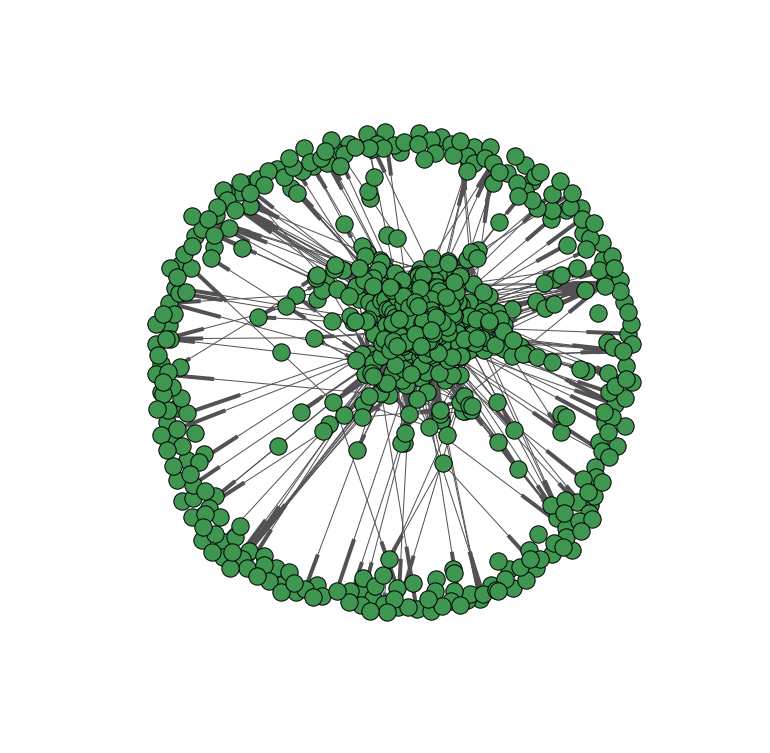

In [19]:
pos = pos=nx.spring_layout(G, scale=2)
plt.figure(num=None, figsize=(10, 10), dpi=1200)
nx.draw(G,pos, node_color='#3E9651', edge_color='#535154')
plt.show()

# Part C: Analyzing the networks

Now that we have the network, it's time to do a preliminary analysis of it (we'll go more in depth next time).

> _Exercise_: Begin to analyze the philosopher network.
> 
> * Why do you think we want to use a directed graph? Could have we used an undirected graph instead?
> * What is the total number of nodes in the network? What is the total number of links? What's the average degree? What's the median degree?
> * List the top 10 philosophers by in-degree and out-degree. What is the interpretation of in-degree and out-degree in this case? Have you heard about these philosophers before?
> * Plot the distribution of in-degrees and out-degrees, binned using `numpy.histogram`. What is the most common degree?
> * Plot the distribution of in-degrees and out-degrees one more time, this time plotted loglog scale.
> * Describe the distributions (as you would in a well written figure caption). Do they look Poissonian? Power-law? Something in between?
> * Plot a scatter plot of the the in- versus out- degree for all philosophers using a loglog scale. Comment on the relation between the two.
>

In [ ]:
print "The total number of nodes in the network is %s." %nx.number_of_nodes(G)
print "The total number of links in the network is %s. The total number of edges is less than" %G.number_of_edges()
print "the length of match because duplicates will not be added to the graph."
print "The average degree is %s" %np.mean(nx.degree(G).values())
print "The median degree is %s" %np.median(nx.degree(G).values())


In [ ]:
print "Top 10 philosophers by in-degree:\n"
pri = sorted(G.in_degree_iter(),key=itemgetter(1),reverse=True)[:10]
for i in range(len(pri)):
    if len(pri[i][0]) > 24:
        print "%s\t%s" %(pri[i][0],pri[i][1])
    elif len(pri[i][0]) > 15:
        print "%s%s%s" %(pri[i][0],'\t\t',pri[i][1])
    elif len(pri[i][0]) > 8:
        print "%s%s%s" %(pri[i][0],'\t\t\t',pri[i][1]) 
    else:
        print "%s%s%s" %(pri[i][0],'\t\t\t\t',pri[i][1])
print
print "Top 10 philosophers by out-degree:\n"
pri = sorted(G.out_degree_iter(),key=itemgetter(1),reverse=True)[:10]
for i in range(len(pri)):
    if len(pri[i][0]) > 24:
        print "%s\t%s" %(pri[i][0],pri[i][1])
    elif len(pri[i][0]) > 15:
        print "%s%s%s" %(pri[i][0],'\t\t',pri[i][1])
    elif len(pri[i][0]) > 8:
        print "%s%s%s" %(pri[i][0],'\t\t\t',pri[i][1]) 
    else:
        print "%s%s%s" %(pri[i][0],'\t\t\t\t',pri[i][1])

In [ ]:
in_de = G.in_degree().values()
out_de = G.out_degree().values()
in_de_max = max(in_de)
out_de_max = max(out_de)

plt.figure(num=None, figsize=(15, 5), dpi=1200)
plt.subplot(1,2,1)
plt.title('In degree')
plt.hist(in_de,bins=range(in_de_max),color='teal')
plt.ylabel('Number of nodes with n links')
plt.xlabel('Number of links (n)')
plt.subplot(1,2,2)
plt.title('Out degree')
plt.hist(out_de,bins=range(out_de_max),color='teal')
plt.ylabel('Number of nodes with n links')
plt.xlabel('Number of links (n)')

plt.show()



This pattern matches the power law mentioned in the Barabasi book. Most of the nodes have a low amount of links and few nodes with many links(Hubs). The spread of links is over twice the size with in degree compared to out degree. It can be observed that most of the nodes have 20 or less links.

In [ ]:
plt.figure(num=None, figsize=(15, 5), dpi=1200)

plt.subplot(1,2,1)
plt.title('In degree')
plt.hist(in_de,bins=range(in_de_max),color='teal')
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.yscale('log')
plt.xscale('log')

plt.subplot(1,2,2)
plt.title('Out degree')
plt.hist(out_de,bins=range(out_de_max),color='teal')
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.yscale('log')
plt.xscale('log')

plt.show()

In [ ]:
plt.figure(num=None, figsize=(15, 5), dpi=1200)
plt.subplot(1,2,1)
plt.scatter(in_de,out_de)
plt.subplot(1,2,2)
plt.scatter(in_de,out_de)
plt.yscale('log')
plt.xscale('log')
plt.show()

In [ ]:
# this create the kernel, given an array it will estimate the probability over that values
kde = stats.gaussian_kde(in_de)
# these are the values over wich your kernel will be evaluated
dist_space = np.linspace( min(in_de), max(in_de), 100 )
# plot the results
plt.hist(kde(dist_space))